# Explore Homfam 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from Bio import SeqIO
homfam_path_ref = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/homfam/refs"
outdir = "../../../data/structural_regression/plots/01_homfam/"

In [2]:
def get_stats(f, extended = False):
    fasta_sequences = SeqIO.parse(open(f),'fasta')

    ls = []
    n_sequences = 0 

    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        n_sequences = n_sequences + 1
        l = len(sequence.replace("-", ""))
        ls.append(l)
        # if extended, save all infos about the sequences
        

    entry = pd.DataFrame({"file": [os.path.basename(f).replace(".fa", "")],
                          "n_sequences": [n_sequences],
                          "mean_length": [np.mean(ls)],
                          "min_length": [np.min(ls)],
                          "max_length": [np.max(ls)]})       


    return(entry)

In [3]:
def get_summary_df(homfam_path, subset = "", suffix = ""):
    summary_homfam = pd.DataFrame()
    max_steps = float("Inf")
    i = 0 
    for filename in os.listdir(homfam_path):
        if filename.endswith(suffix):
            i = i+1
            if(i>max_steps): 
                break
            f = os.path.join(homfam_path, filename)
            # checking if it is a file
            if os.path.isfile(f):
                entry = get_stats(f)
                summary_homfam = summary_homfam.append(entry, ignore_index= True)
    summary_homfam["family"] = summary_homfam.file.str.replace(".ref", "", regex = False)
    summary_homfam["subset"] = subset
    summary_homfam.sort_values(by=['family'])

    column_names = ["family", "subset", "n_sequences","mean_length", "min_length", "max_length", "file"]
    summary_homfam = summary_homfam.reindex(columns=column_names)
    return(summary_homfam)

#### Homfam

In [10]:
summary_homfam_ref = get_summary_df(homfam_path_ref, "ref", "fa")
summary_homfam_ref.head()

/tmp/ipykernel_49316/574803492.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_homfam = summary_homfam.append(entry, ignore_index= True)


,family,subset,n_sequences,mean_length,min_length,max_length,file
0,DMRL_synthase-ref,ref,5,158.0,148,168,DMRL_synthase-ref
1,oxidored_q6-ref,ref,5,265.2,261,275,oxidored_q6-ref
2,ghf22-ref,ref,12,126.5,120,130,ghf22-ref
3,TNF-ref,ref,5,149.6,144,163,TNF-ref
4,slectin-ref,ref,5,133.4,129,137,slectin-ref


Text(0.5, 1.0, 'Homfam')

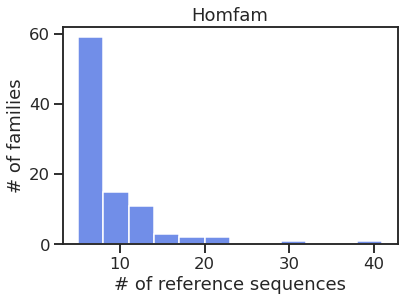

In [11]:
sns.set_style("ticks")
sns.set_context("talk")
sns.set_palette(sns.color_palette(["royalblue"]))

ax = sns.histplot(data=summary_homfam_ref, x="n_sequences", binwidth=3)
ax.set_xlabel("# of reference sequences")
ax.set_ylabel("# of families")
ax.set_title("Homfam")

Text(0.5, 1.0, 'Homfam')

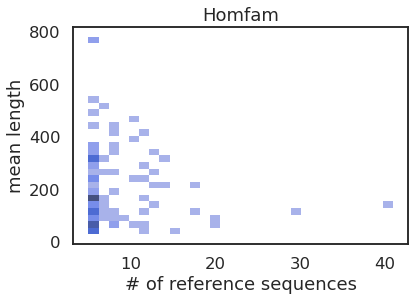

In [12]:
sns.set_style("white")
ax = sns.histplot(
    summary_homfam_ref, x="n_sequences", y="mean_length",
    bins=30
)
ax.set_xlabel("# of reference sequences")
ax.set_ylabel("mean length")
ax.set_title("Homfam")



In [13]:
# Prep homfam
# Add group sizes
#[200,10k), [10k,40k), [40k,100k), [100k,250k), [250k,3M).
#thresholds = [4000,10000,25000,415519]
summary_homfam_combined = get_summary_df(homfam_path_combined, "combined")
thresholds = [10000,40000,100000,250000]
thresholds_str = list(["[0,10k)", "[10k,40k)", "[40k,100k)", "[100k,250k)", "[250k,3M)"])
def get_size_families(summary_homfam_combined, thresholds = thresholds): 
    summary_homfam_combined["size_group"] = "huge"
    summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[3], "size_group"] = "xlarge"
    summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[2], "size_group"] = "large"
    summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[1], "size_group"] = "medium"
    summary_homfam_combined.loc[summary_homfam_combined.n_sequences < thresholds[0], "size_group"] = "small"
    return(summary_homfam_combined)
summary_homfam_combined = get_size_families(summary_homfam_combined)

NameError: name 'homfam_path_combined' is not defined

In [8]:
family_sizes = summary_homfam_combined[["family", "size_group"]]
summary_homfam_ref.family = summary_homfam_ref.family.str.replace("-ref", "")
summary_homfam_ref_with_sizes = pd.merge(summary_homfam_ref, family_sizes, on = "family" ) 

NameError: name 'summary_homfam_combined' is not defined

In [9]:
sns.set_style("white")
summary_homfam_ref_with_sizes['size_group'] = pd.Categorical(summary_homfam_ref_with_sizes['size_group'], ['small','medium','large'])
#sns.set_palette("magma",3)
sns.set_palette(sns.color_palette(["gold", "blue", "crimson"]))

ax = sns.histplot(
    summary_homfam_ref_with_sizes, x="n_sequences", y="size_group", hue = "size_group", legend = False ,  bins=30
)
ax.set_xlabel("# of reference sequences")
ax.set_ylabel("family group")
ax.set_title("Homfam")


NameError: name 'summary_homfam_ref_with_sizes' is not defined